In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('data/train.csv', dtype={'fullVisitorId' : str, 'visitId' : str})

In [35]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   channelGrouping                 903653 non-null  object        
 1   date                            903653 non-null  datetime64[ns]
 2   fullVisitorId                   903653 non-null  object        
 3   sessionId                       903653 non-null  object        
 4   visitId                         903653 non-null  object        
 5   visitNumber                     903653 non-null  int64         
 6   visitStartTime                  903653 non-null  datetime64[ns]
 7   browser                         903653 non-null  object        
 8   operatingSystem                 903653 non-null  object        
 9   isMobile                        903653 non-null  bool          
 10  deviceCategory                  903653 non-null  int32  

,visitNumber,deviceCategory,hits,bounces,newVisits,transactionRevenue,adwordsClickInfo.page,adwordsClickInfo.slot,isSearched,hour,dayOfWeek,isWeekday
count,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,9.036530e+05,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,2.264897,0.298370,4.596538,0.498676,0.778020,1.704273e+06,1.008108,1.975694,0.443449,12.529160,2.735183,0.780883
std,9.283735,0.526058,9.641437,0.499999,0.415578,5.277866e+07,0.026749,0.157577,0.496792,6.825449,1.929072,0.413649
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.008108,2.000000,0.000000,7.000000,1.000000,1.000000
50%,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000e+00,1.008108,2.000000,0.000000,14.000000,3.000000,1.000000
75%,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000e+00,1.008108,2.000000,1.000000,18.000000,4.000000,1.000000
max,395.000000,2.000000,500.000000,1.000000,1.000000,2.312950e+10,14.000000,2.000000,1.000000,23.000000,6.000000,1.000000


In [4]:
train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


### Преобразование JSON в столбцы

In [5]:
train.date = pd.to_datetime(train.date, format='%Y%m%d')
train.visitStartTime = pd.to_datetime(train.visitStartTime, unit='s')
train = pd.merge(left=train, right=pd.json_normalize(train.device.apply(json.loads)), 
                 left_index=True, right_index=True).drop('device', axis=1)
train = pd.merge(left=train, right=pd.json_normalize(train.geoNetwork.apply(json.loads)), 
                 left_index=True, right_index=True).drop('geoNetwork', axis=1)
train = pd.merge(left=train, right=pd.json_normalize(train.totals.apply(json.loads)), 
                 left_index=True, right_index=True).drop('totals', axis=1)
train = pd.merge(left=train, right=pd.json_normalize(train.trafficSource.apply(json.loads)), 
                 left_index=True, right_index=True).drop('trafficSource', axis=1)

### Получение количественных, булевых и временных характеристик

In [6]:
train.isTrueDirect = train.isTrueDirect.fillna(False)
train.hits = train.hits.astype(int)
train.visits = train.visits.astype(int)
train.pageviews = train.pageviews.fillna(train.pageviews.astype(float).mean()).astype(int)
train.newVisits = train.newVisits.fillna(0).astype(int)
train.bounces = train.bounces.fillna(0).astype(int)
train.transactionRevenue = train.transactionRevenue.fillna(0).astype(float)
train['adwordsClickInfo.page'] = train['adwordsClickInfo.page'].astype(float)
train['adwordsClickInfo.page'] = train['adwordsClickInfo.page'].fillna(train['adwordsClickInfo.page'].mean())
train['adwordsClickInfo.slot'] = train['adwordsClickInfo.slot'].fillna('unknown')
train['adwordsClickInfo.slot'] = train['adwordsClickInfo.slot'].astype('category')

### Нахождение вероятных категориальных признаков

In [7]:
for c in train:
    if train[c].nunique() <= 50:
        print(c, train[c].nunique())

channelGrouping 8
socialEngagementType 1
browserVersion 1
browserSize 1
operatingSystem 20
operatingSystemVersion 1
isMobile 2
mobileDeviceBranding 1
mobileDeviceModel 1
mobileInputSelector 1
mobileDeviceInfo 1
mobileDeviceMarketingName 1
flashVersion 1
language 1
screenColors 1
screenResolution 1
deviceCategory 3
continent 6
subContinent 23
cityId 1
latitude 1
longitude 1
networkLocation 1
visits 1
bounces 2
newVisits 2
campaign 10
medium 7
adwordsClickInfo.criteriaParameters 1
isTrueDirect 2
adwordsClickInfo.page 9
adwordsClickInfo.slot 3
adwordsClickInfo.adNetworkType 2
adwordsClickInfo.isVideoAd 1
adContent 44
campaignCode 1


### Удаление столбцов с одним значением

In [8]:
for c in train:
    if train[c].nunique() == 1:
        train = train.drop(c, axis=1)

### Просмотр корреляции между признаками

In [9]:
corr_matrix = train.drop(set(train.select_dtypes(include=['object', 'bool']).columns).union(['transactionRevenue']) , axis=1).corr()

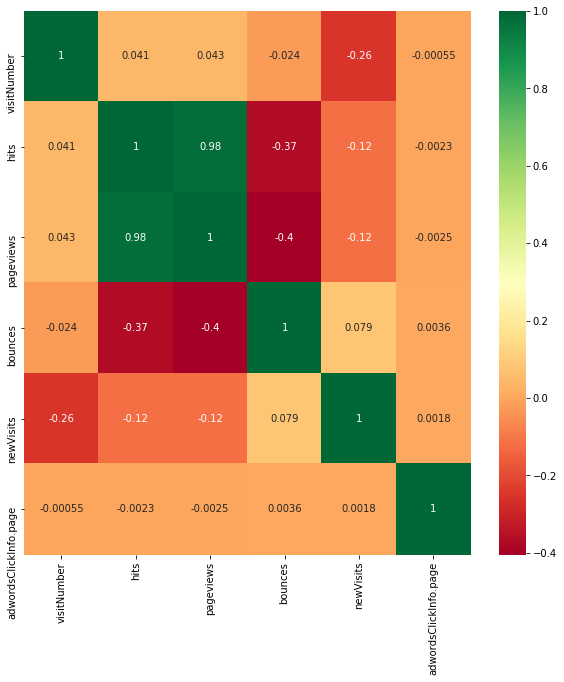

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True,cmap="RdYlGn")

### Удаление признака, у которого большая корреляция с другим признаком

In [11]:
train = train.drop('pageviews', axis=1)

### Получение категориальных признаков, количество уникальных значений которых меньше 5

In [12]:
features = []
for c in train:
    if 2 < train[c].nunique() < 5:
        features.append(c)
encoder = LabelEncoder()
train[features] = train[features].apply(encoder.fit_transform)

### Анализ текстовых признаков

In [13]:
train.source.value_counts()

google                                               400788
youtube.com                                          212602
(direct)                                             143028
mall.googleplex.com                                   66416
Partners                                              16411
                                                      ...  
0.shared.bow.cat2.ads-bow.qk.borg.google.com:9899         1
0.shared.bow.cat2.ads-bow.yw.borg.google.com:9892         1
lmgtfy.com                                                1
dailydot.com                                              1
google.no                                                 1
Name: source, Length: 380, dtype: int64

In [14]:
train.adContent.value_counts()

Google Merchandise Collection                  5122
Google Online Store                            1245
Display Ad created 3/11/14                      967
Full auto ad IMAGE ONLY                         822
Ad from 12/13/16                                610
Ad from 11/3/16                                 489
Display Ad created 3/11/15                      392
{KeyWord:Google Brand Items}                    251
{KeyWord:Google Merchandise}                    155
Ad from 11/7/16                                 123
Google Merchandise                               87
First Full Auto Template Test Ad                 87
20% discount                                     75
{KeyWord:Google Branded Gear}                    67
{KeyWord:Looking for Google Bags?}               65
Swag with Google Logos                           64
Display Ad created 11/17/14                      50
{KeyWord:Want Google Stickers?}                  42
JD_5a_v1                                         41
{KeyWord:Goo

In [15]:
train['adwordsClickInfo.adNetworkType'].value_counts()

Google Search      21453
Search partners        7
Name: adwordsClickInfo.adNetworkType, dtype: int64

In [16]:
train.referralPath.value_counts()

/                                                                                                                                                                                     75523
/yt/about/                                                                                                                                                                            71036
/analytics/web/                                                                                                                                                                       14620
/yt/about/tr/                                                                                                                                                                         14599
/yt/about/vi/                                                                                                                                                                         13753
                                                            

In [17]:
train.keyword.value_counts()

(not provided)                          366363
6qEhsCssdK0z36ri                         11503
(Remarketing/Content targeting)           2298
1hZbAqLCbjwfgOH7                          2264
google merchandise store                  2209
                                         ...  
youtube genuine t shirts                     1
android developers tshirt buy online         1
Google io t shirts                           1
Google store Seattle                         1
goole web store                              1
Name: keyword, Length: 3659, dtype: int64

### Перевод строк в компании

In [18]:
import re

def replace_company(df, column, old, new=None):
    if new is None:
        new = old
    df[column] = df[column].str.lower()
    regex_exp = re.compile(r'(\d|\D)*' + old + '(\d|\D)*')
    df[column] = df[column].replace(regex_exp, new)
    return df

In [19]:
train = replace_company(train, 'source', 'google')
train = replace_company(train, 'source', 'facebook')
train = replace_company(train, 'source', 'yahoo')
train = replace_company(train, 'source', 'pinterest')
train = replace_company(train, 'source', 'bing')
train = replace_company(train, 'source', 'qiita')
train = replace_company(train, 'source', 'ask')
train = replace_company(train, 'source', 'reddit')
train = replace_company(train, 'source', 'youtube')

### Перевод строк в рекламу

### Перевод строк в ссылку

### Получение признака того, искал ли человек или нет

In [20]:
train['isSearched'] = list(map(lambda x: 0 if x is np.nan else 1, train.keyword))

### Просмотр распределения среднего transaction revenue по часам

In [21]:
train['hour'] = train.visitStartTime.dt.hour

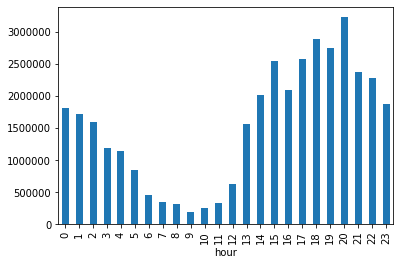

In [22]:
train.groupby('hour').transactionRevenue.mean().plot(kind='bar')

### Просмотр распределения среднего transaction revenue по дням недели

In [23]:
train['dayOfWeek'] = train['date'].dt.dayofweek

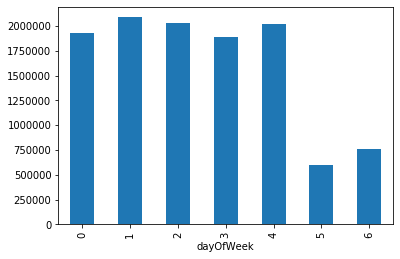

In [24]:
train.groupby('dayOfWeek').transactionRevenue.mean().plot(kind='bar')

Из графика можно увидеть, что на будние дни приходится большое среднее значение покупок, потому имеет смысл закодировать дни недели, как бинарную переменную.

In [27]:
train['isWeekday'] = list(map(lambda x: 1 if x < 5 else 0, train.dayOfWeek))

### Просмотр распределения среднего transaction revenue по месяцам

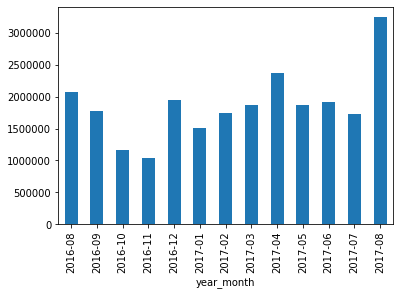

In [31]:
train['year_month'] = train.date.dt.strftime('%Y-%m')
train.groupby('year_month').transactionRevenue.mean().plot(kind='bar')

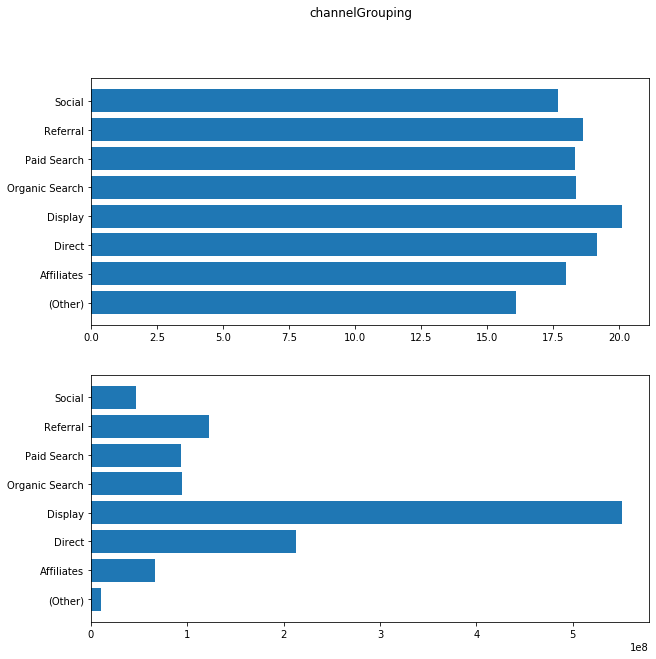

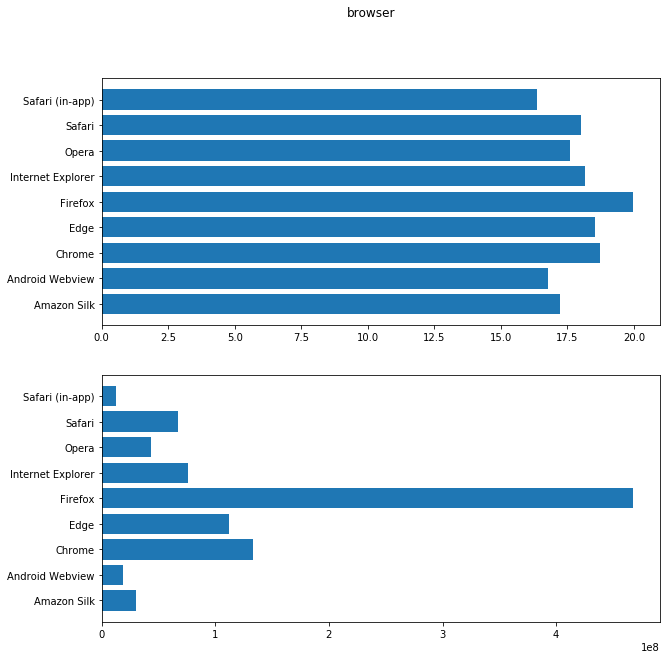

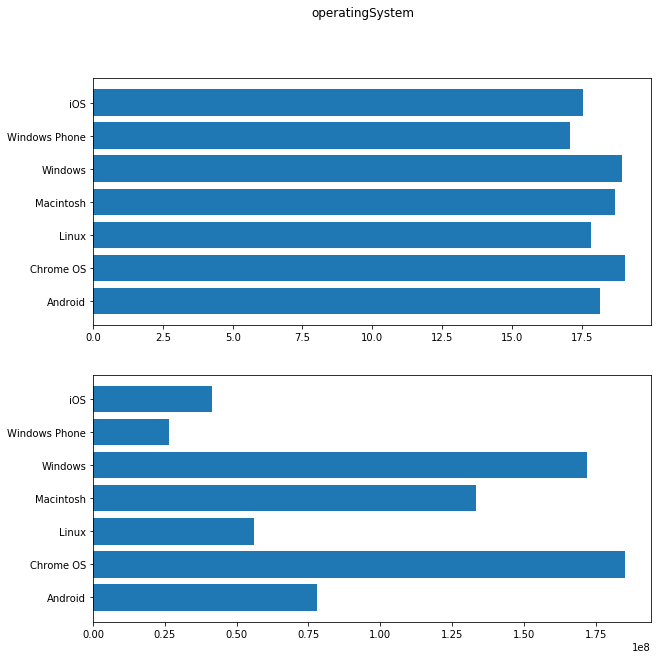

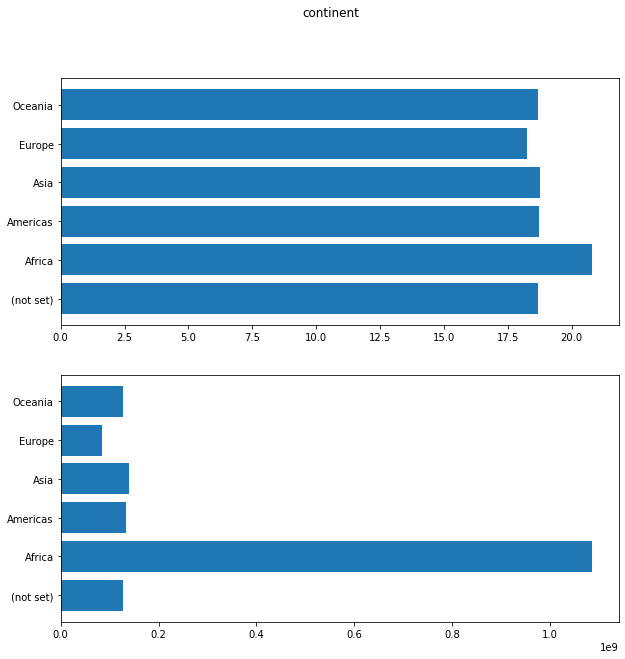

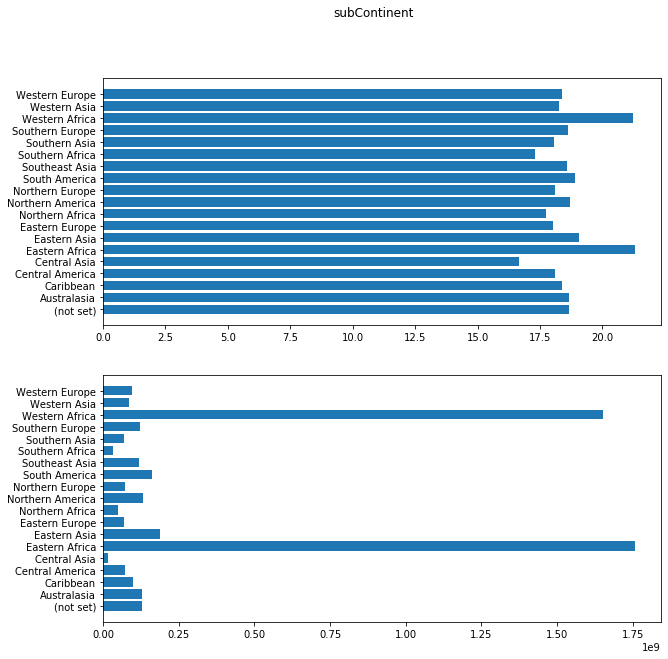

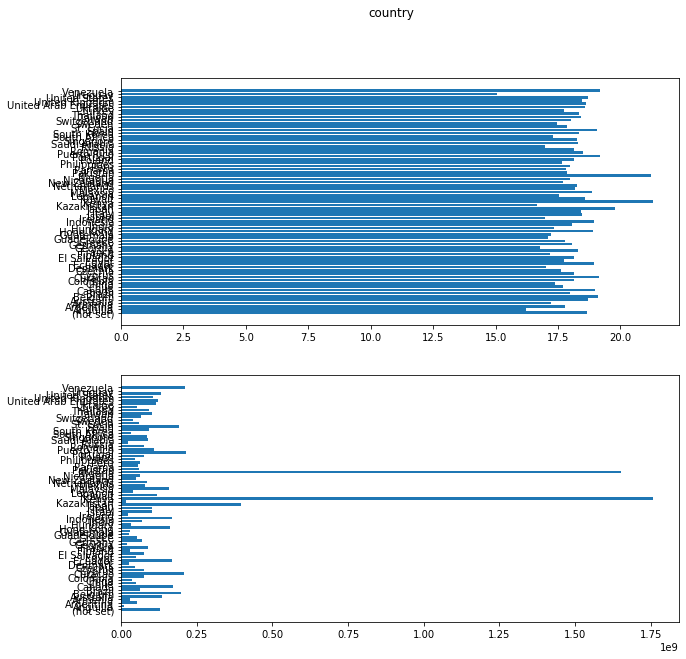

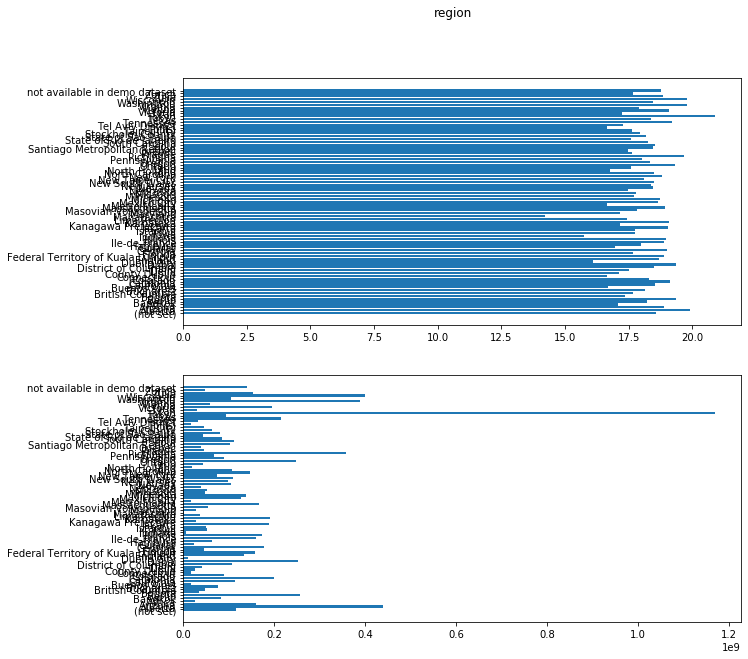

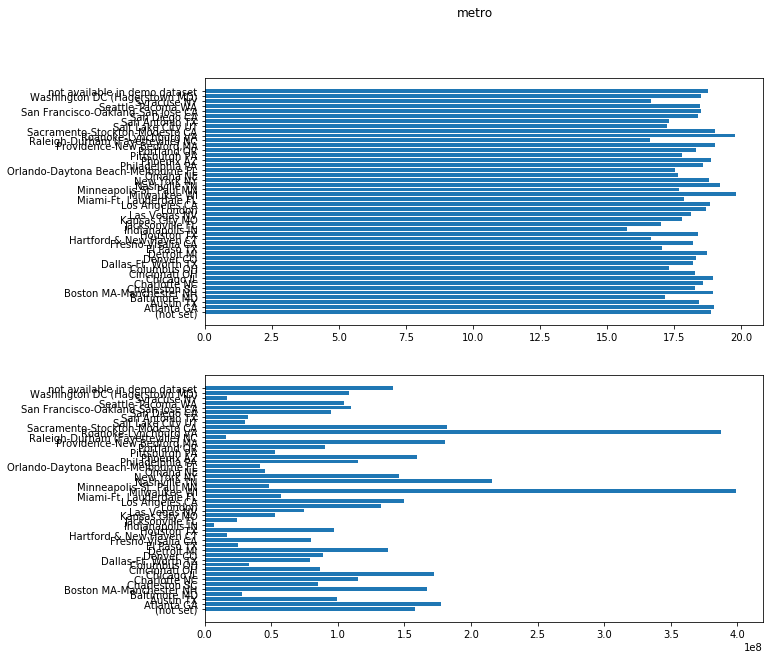

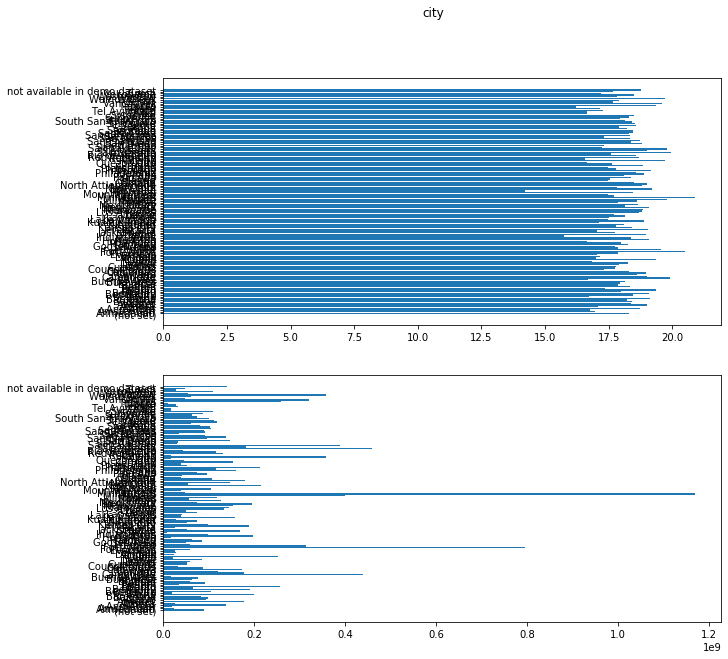

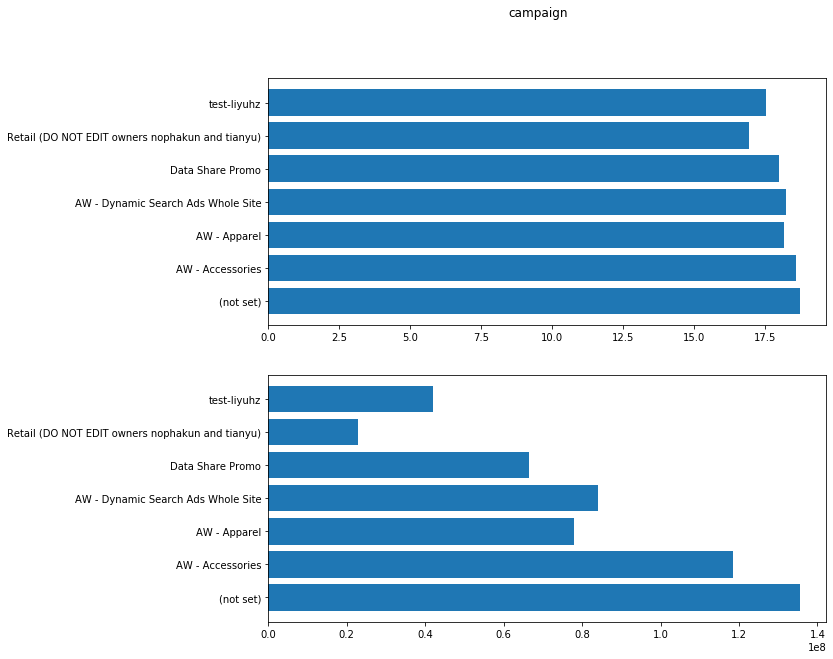

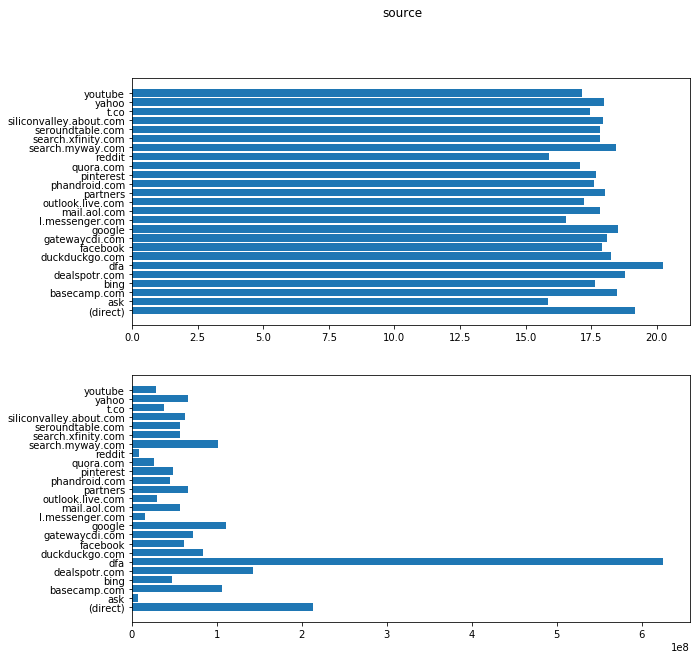

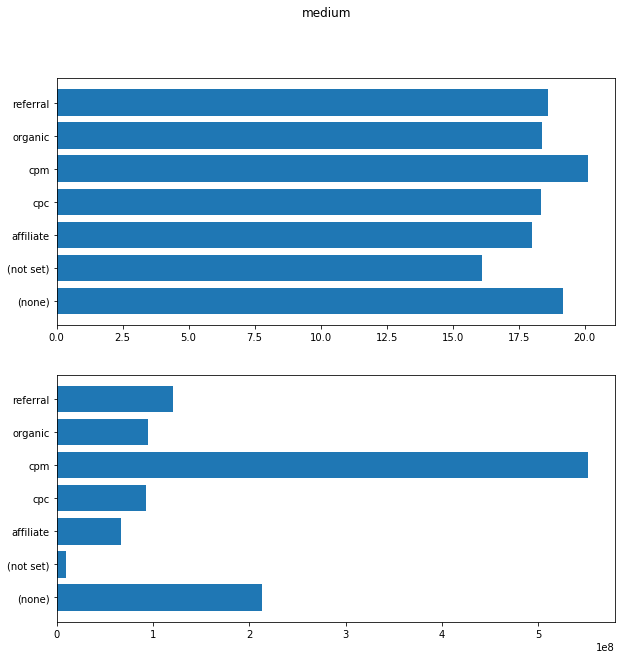

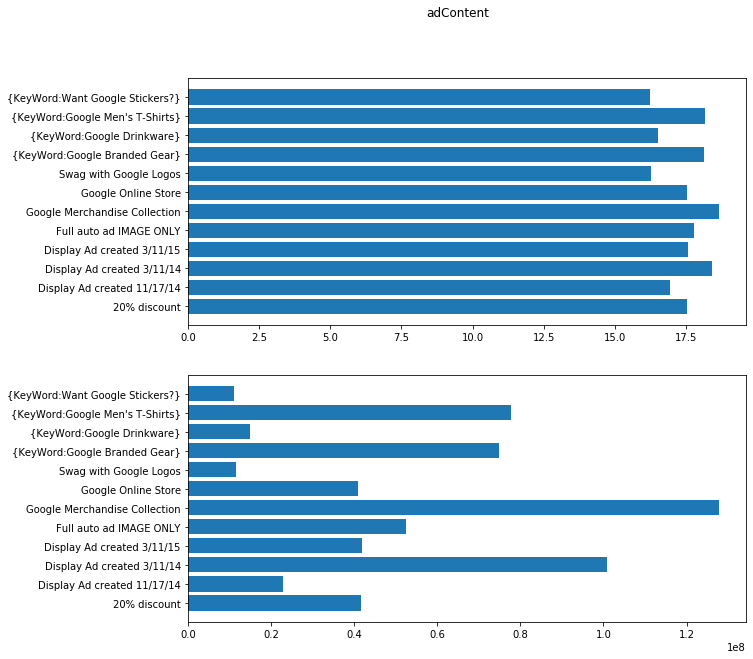

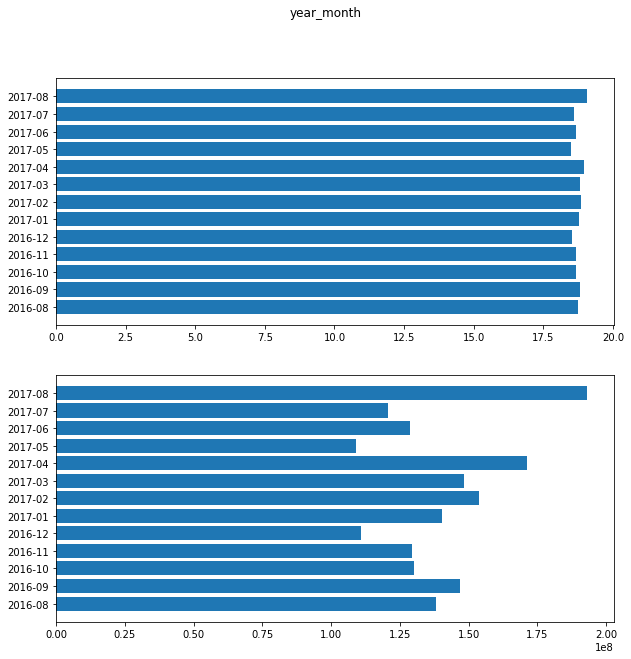

In [26]:
for c in train:
    if 5 <= train[c].nunique() <= 1000 and train[c].dtype == 'object':
        fig, axs = plt.subplots(2, figsize=(10, 10))
        fig.suptitle(c)
        grouped = train.loc[train.transactionRevenue != 0].groupby(c).transactionRevenue.mean().reset_index()
        axs[0].barh(grouped[c], np.log(1 + grouped.transactionRevenue))
        axs[1].barh(grouped[c], grouped.transactionRevenue)
        plt.show()

In [27]:
def get_codes_by_conditions(column, df, conditions):
    df = df.groupby(column).transactionRevenue.sum().reset_index()
    codes = {}
    value = np.log(1 + df.transactionRevenue)
    for c in range(len(conditions) - 1):
        values = df.loc[(conditions[c] <= value) & (value < conditions[c + 1])][column]
        for v in values:
            codes[v] = c
    return codes

In [28]:
def show_subplots(column, df):
    fig, axs = plt.subplots(2, figsize=(10, 10))
    fig.suptitle(column)
    grouped = df.groupby(column).transactionRevenue.sum().reset_index()
    axs[0].barh(grouped[column], np.log(1 + grouped.transactionRevenue))
    axs[1].barh(grouped[column], grouped.transactionRevenue)
    plt.show()

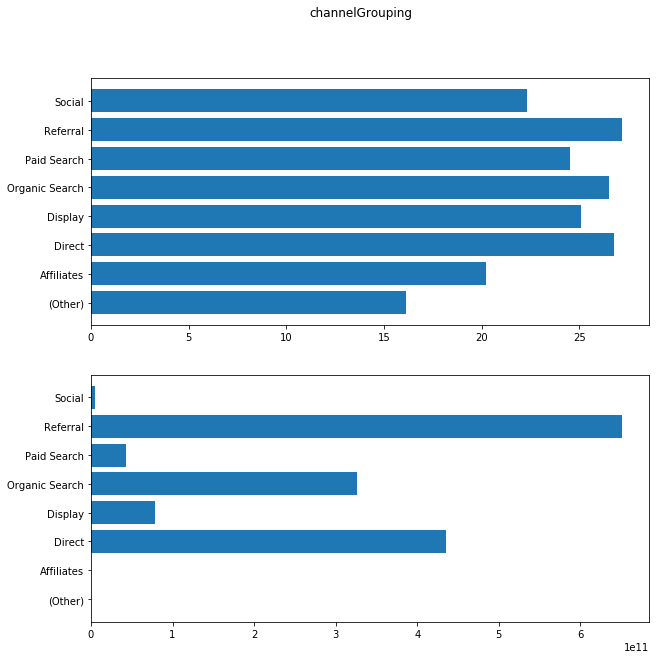

In [29]:
show_subplots('channelGrouping', train)

In [30]:
conditions = [0, 15, 23, 30]
train.channelGrouping = train.channelGrouping.map(get_codes_by_conditions('channelGrouping', train, conditions))

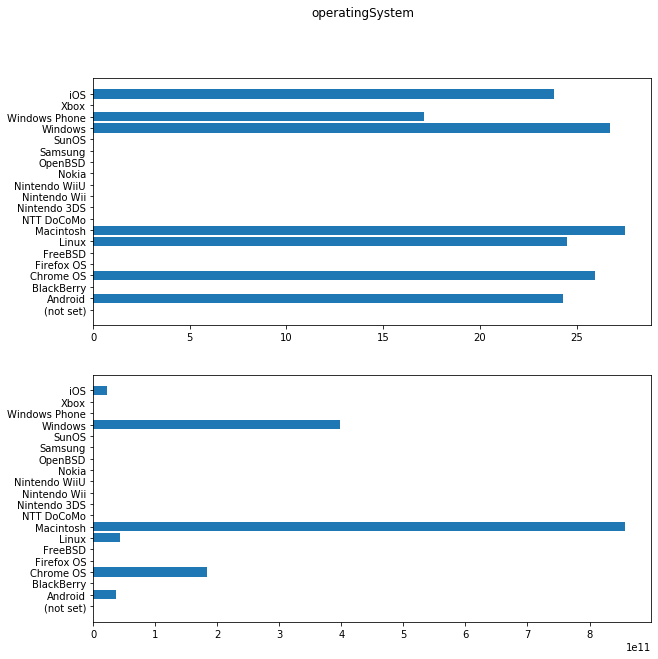

In [31]:
show_subplots('operatingSystem', train)

In [32]:
conditions = [0, 15, 20, 24, 30]
train.operatingSystem = train.operatingSystem.map(get_codes_by_conditions('operatingSystem', train, conditions))

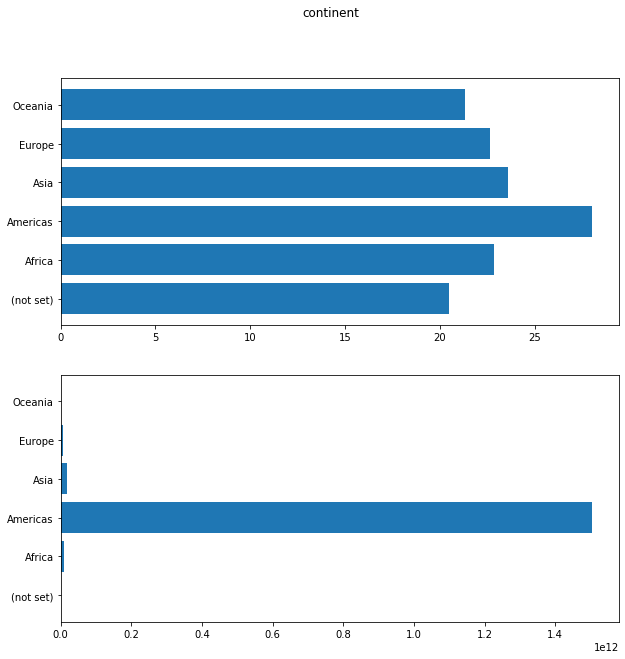

In [33]:
show_subplots('continent', train)

In [34]:
conditions = [0, 15, 25, 30]
train.continent = train.continent.map(get_codes_by_conditions('continent', train, conditions))

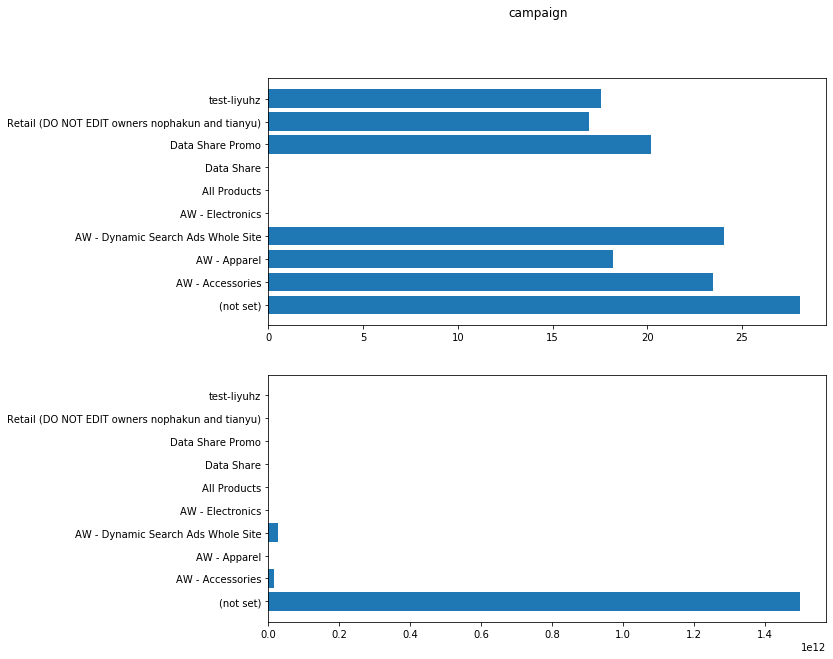

In [35]:
show_subplots('campaign', train)

In [36]:
conditions = [0, 15, 25, 30]
train.medium = train.medium.map(get_codes_by_conditions('medium', train, conditions))

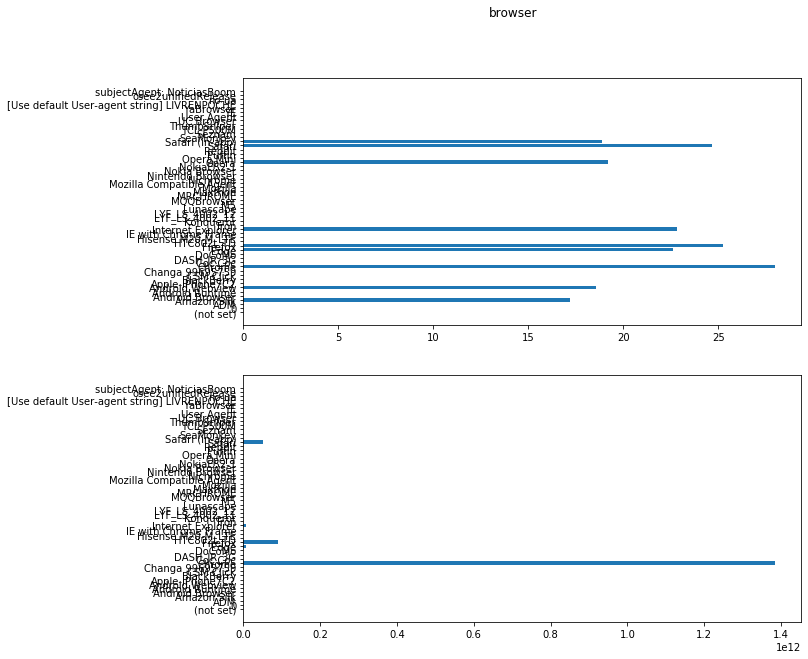

In [37]:
show_subplots('browser', train)

In [38]:
conditions = [0, 15, 22.5, 25, 30]
train.browser = train.browser.map(get_codes_by_conditions('browser', train, conditions))

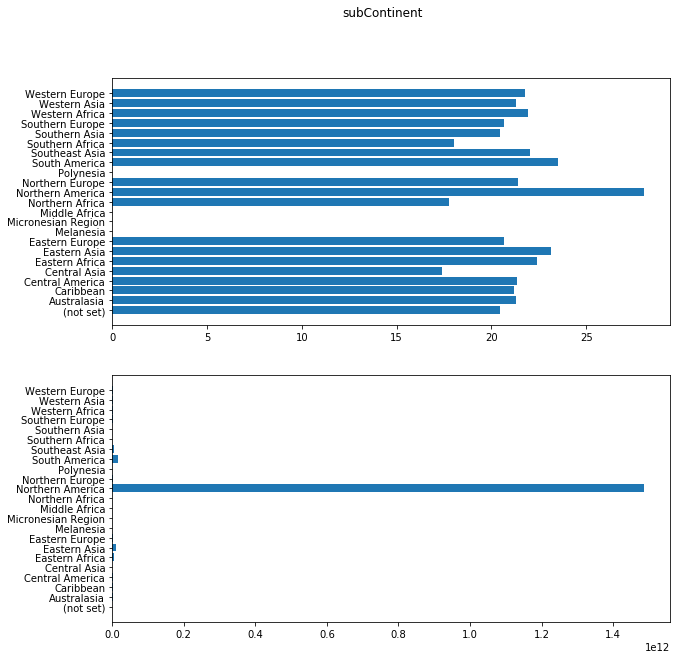

In [39]:
show_subplots('subContinent', train)

In [40]:
conditions = [0, 15, 20, 25, 30]
train.subContinent = train.subContinent.map(get_codes_by_conditions('subContinent', train, conditions))

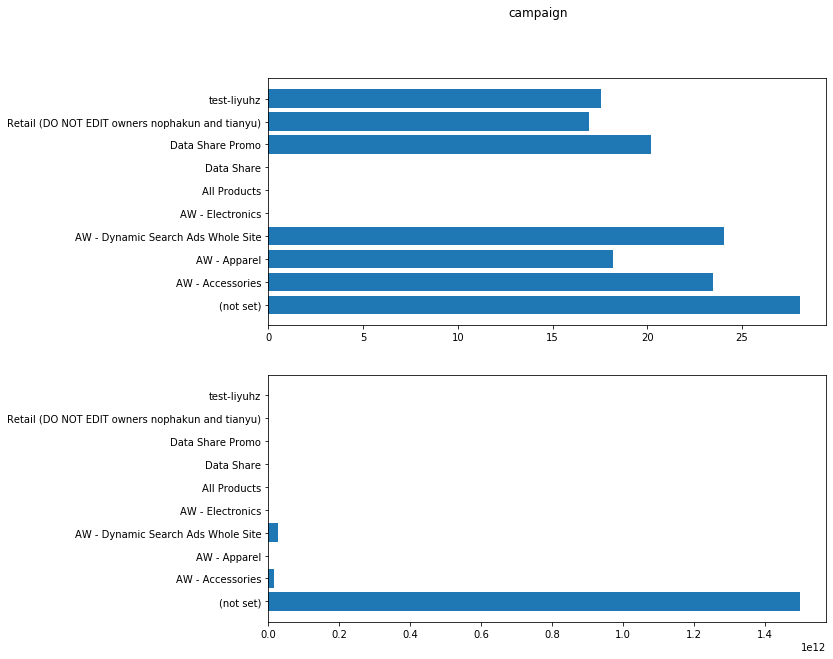

In [41]:
show_subplots('campaign', train)

In [42]:
conditions = [0, 15, 25, 30]
train.campaign = train.campaign.map(get_codes_by_conditions('campaign', train, conditions))

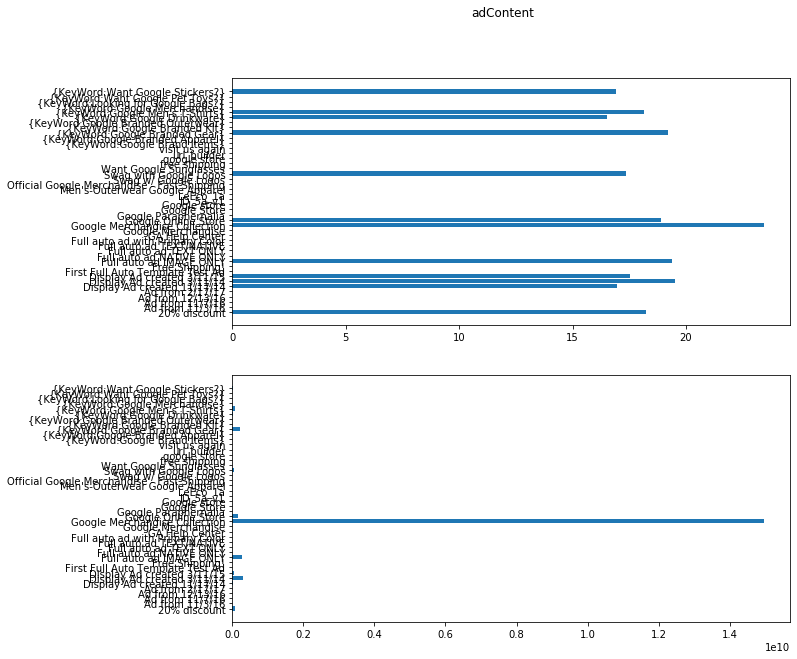

In [43]:
show_subplots('adContent', train)

In [44]:
conditions = [0, 15, 20, 30]
train.adContent = train.adContent.map(get_codes_by_conditions('adContent', train, conditions))

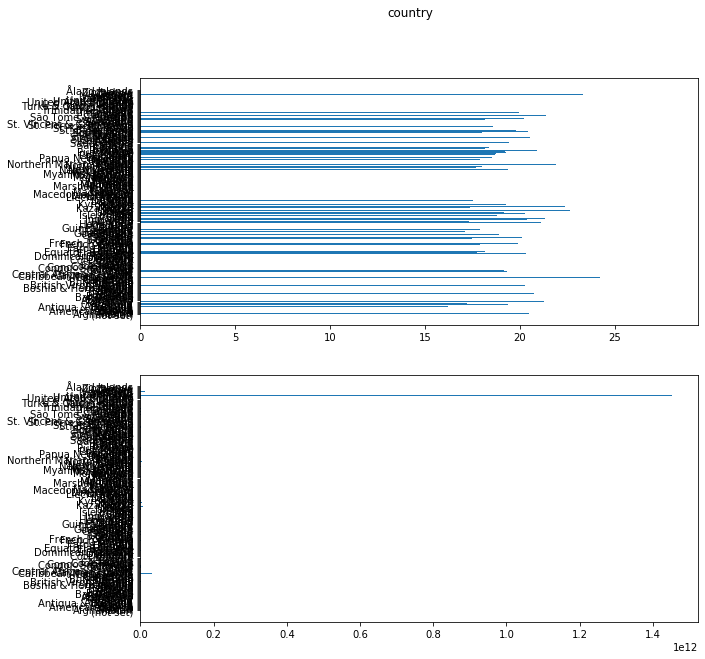

In [45]:
show_subplots('country', train)

In [46]:
conditions = [0, 15, 21, 25, 30]
train.country = train.country.map(get_codes_by_conditions('country', train, conditions))

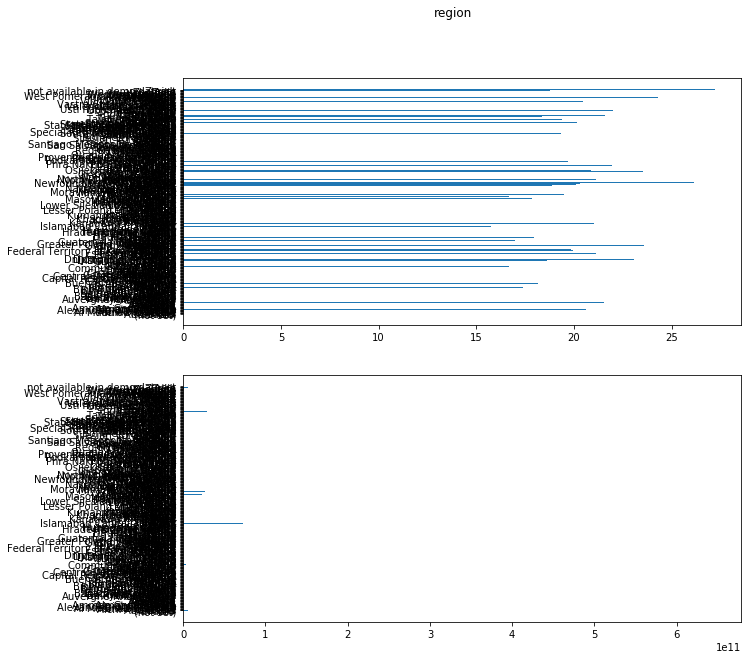

In [47]:
show_subplots('region', train)

In [48]:
conditions = [0, 15, 20, 23, 30]
train.region = train.region.map(get_codes_by_conditions('region', train, conditions))

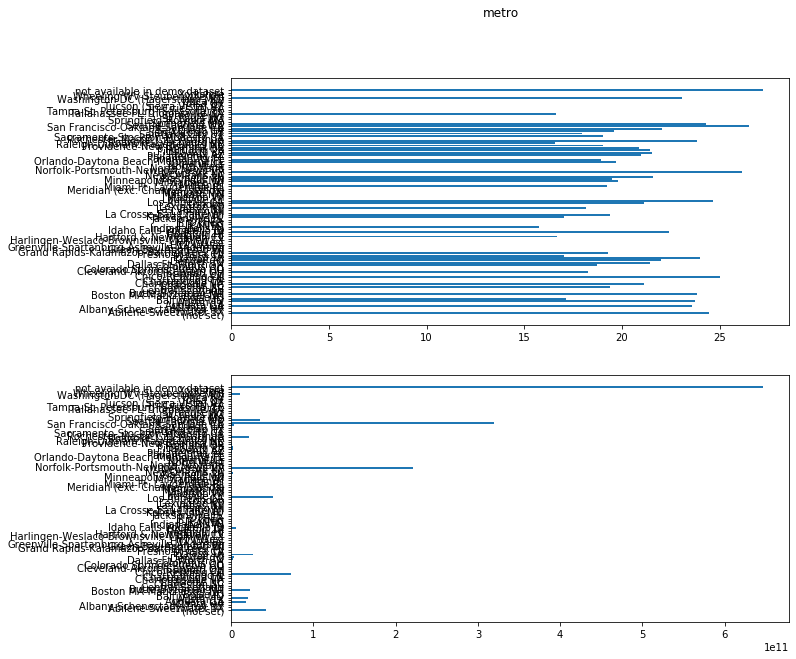

In [49]:
show_subplots('metro', train)

In [50]:
conditions = [0, 15, 20, 24, 30]
train.metro = train.metro.map(get_codes_by_conditions('metro', train, conditions))

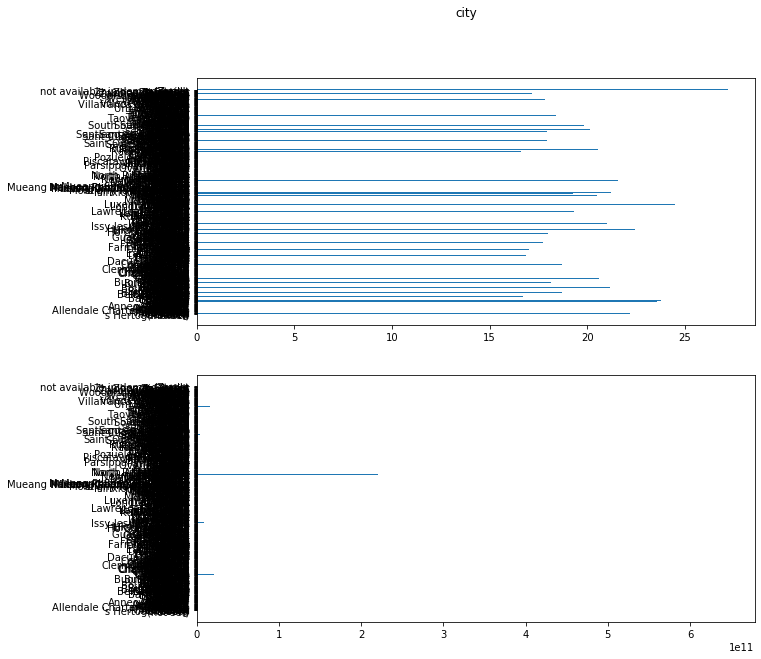

In [51]:
show_subplots('city', train)

In [52]:
conditions = [0, 15, 21, 24, 30]
train.city = train.city.map(get_codes_by_conditions('city', train, conditions))

In [53]:
train = train.drop(['city', 'country', 'continent', 'campaign', 'pageviews'], axis=1)

KeyError: "['pageviews'] not found in axis"

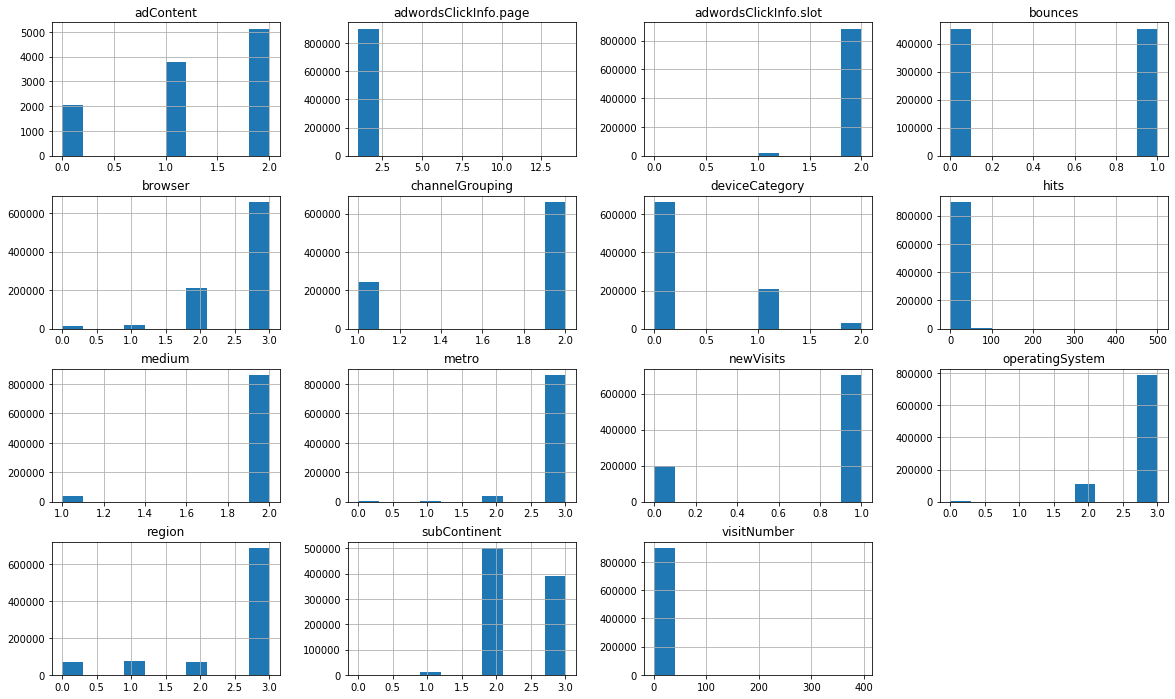

In [102]:
features = list(set(train.select_dtypes(exclude=['object', 'bool']).columns) - set(['transactionRevenue']))
train[features].hist(figsize=(20,12));

In [32]:
!pip install mlxtend

In [33]:
df = pd.merge(left=train.fullVisitorId, right=train.select_dtypes(exclude=['object']), 
              left_index=True, right_index=True)
df = df.groupby('fullVisitorId').sum().reset_index()

In [36]:
columns = {}
df = pd.merge(left=train.fullVisitorId, right=train.select_dtypes(exclude=['object']), 
              left_index=True, right_index=True)
for c in df:
    if df[c].nunique() <= 10:
        columns[c] = 'median'
columns['transactionRevenue'] = 'sum'
df = df.groupby('fullVisitorId').agg(columns).reset_index()
#df.adContent = df.adContent.fillna(-1)

In [37]:
X = df.drop(['fullVisitorId', 'transactionRevenue'], axis=1)
y = np.log(df.transactionRevenue + 1)

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

selector = SequentialFeatureSelector(LinearRegression(), verbose=2, k_features=5, forward=False, n_jobs=-1)
selector.fit(X, y)
selector.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   13.0s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.4s finished

[2020-05-16 12:59:43] Features: 9/5 -- score: 0.06267899022602752[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    6.6s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    8.2s finished

[2020-05-16 12:59:52] Features: 8/5 -- score: 0.062679500814721[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    4.7s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.5s finished

[2020-05-16 12:59:57] F

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.06233942, 0.06702454, 0.06357246, 0.06000279, 0.06045174]),
  'avg_score': 0.0626781912620279,
  'feature_names': ('isMobile',
   'deviceCategory',
   'bounces',
   'newVisits',
   'isTrueDirect',
   'adwordsClickInfo.page',
   'adwordsClickInfo.slot',
   'isSearched',
   'dayOfWeek',
   'isWeekday')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9),
  'cv_scores': array([0.0623386 , 0.06702439, 0.06357556, 0.06000237, 0.06045403]),
  'avg_score': 0.06267899022602752,
  'feature_names': ('isMobile',
   'deviceCategory',
   'bounces',
   'newVisits',
   'isTrueDirect',
   'adwordsClickInfo.page',
   'adwordsClickInfo.slot',
   'isSearched',
   'isWeekday')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 6, 7, 9),
  'cv_scores': array([0.06233788, 0.06702355, 0.06358205, 0.0600009 , 0.06045312]),
  'avg_score': 0.062679500814721,
  'feature_names': ('isMobile',
   'deviceCategory',
   'bounces',
   'newVisits',
   'isTrue

### Разбиение выборки

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Оценка качества модели

In [43]:
from sklearn.metrics import r2_score, mean_squared_error as MSE

def score(y_test, predicted, model):
    print(model)
    print(r2_score(y_test, predicted))
    print(MSE(y_test, predicted))

### Обучение линейной регрессии

In [44]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
score(y_test, predicted, "Линейная регрессия:")

Линейная регрессия:
0.06493308396821751
4.110268379764485


### Обучение градиентного бустинга

In [45]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

gbm = GBR()
gbm.fit(X_train, y_train)
predicted = gbm.predict(X_test)
score(y_test, predicted, "Градиентный бустинг:")

Градиентный бустинг:
0.10451954844340616
3.936258380683834


### Обучение леса решений

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
predicted = tree.predict(X_test)
score(y_test, predicted, "Дерево решений:")

Дерево решений:
0.08984949467530867
4.000743453461669


### Обучение SVM

In [ ]:
from sklearn.svm import LinearSVC as SVC

svm = SVC()
svm.fit(X_train, y_train)
predicted = svm.predict(X_test)
score(y_test, predicted, "SVM:")

### Кросс-валидация

In [105]:
from sklearn.model_selection import cross_val_score

scores = []
scores.append(cross_val_score(reg, X, y, cv=5).mean())
scores.append(cross_val_score(gbm, X, y, cv=5).mean())
scores.append(cross_val_score(tree, X, y, cv=5).mean())

### Случайное разбиение

In [106]:
def random_split(X, y, model):
    scores = []
    for i in range(20):
        #X_train = X.sample(frac=0.8, random_state=42)
        #y_train = y.loc[X_train.index]
        
        #X_test = X.loc[~X.index.isin(X_train.index)]
        #y_test = y.loc[X_test.index]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model.fit(X_train, y_train)
        predicted = model.predict(X_test)
        score = r2_score(y_test, predicted)
        scores.append(score)
    return scores

In [107]:
scores_random = []
scores_random.append(random_split(X, y, reg))
scores_random.append(random_split(X, y, gbm))
scores_random.append(random_split(X, y, tree))

In [108]:
scores_random[0].append(scores[0])
scores_random[1].append(scores[1])
scores_random[2].append(scores[2])

In [109]:
models = pd.DataFrame({'Линейная регрессия' : scores_random[0], 'Градиентный бустинг' : scores_random[1], 'Дерево решений' : scores_random[2]})

In [110]:
models

,Линейная регрессия,Градиентный бустинг,Дерево решений
0,0.064933,0.104520,0.090286
1,0.064933,0.104520,0.089850
2,0.064933,0.104520,0.089849
3,0.064933,0.104520,0.089850
4,0.064933,0.104520,0.089844
5,0.064933,0.104520,0.089844
6,0.064933,0.104520,0.090286
7,0.064933,0.104520,0.090291
8,0.064933,0.104520,0.090291
9,0.064933,0.104520,0.089844


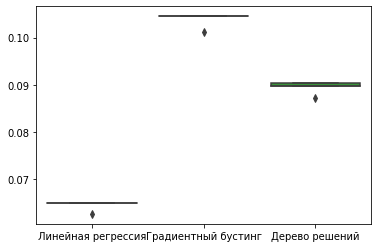

In [111]:
sns.boxplot(data=models)